<a target="_blank" href="https://colab.research.google.com/github/themis-ai/capsa/blob/ed-notebooks/notebooks/4_MVE-Regression.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a>

# Eliminate Aleatoric Uncertainty with `capsa` 
###  A Python Library for Deep Learning Model Risk Management

#### Section 1: What is Aleatoric Uncertainty?

Aleatoric uncertainty, also known as statistical uncertainty, is a type of uncertainty that arises from the inherent noise in a system. For example, if you have a faulty sensor that is collecting data, that added noise because of the faulty part will be causing the aleatoric uncertainty, and will not be reducible without changing how you collect the data.

---------------------

#### Section 2: ``capsa`` (a Python Library for Mitigating Uncertainty)

Capsa is a convenient model wrapping tool. It wraps around predefined Keras models, adding the ability to perform risk analysis on the predictions made by those models, and therefore letting developers make more informed decisions about how to use it in their applications.

``capsa`` allows users to select a MetricWrapper that augments model with a corresponding risk-metric:

- **Representation Bias**: Bias of a dataset that exists in a target feature space in the model 
    - HistogramWrapper
- **Aleatoric Uncertainty**: Uncertainty that results from randomness or inherent noise in the data
    - MVEWrapper
- **Epistemic Uncertainty**: Uncertainty in a model's predictions due to model limitations or limited data
    - DropoutWrapper
    - EnsembleWrapper
    - VAEWrapper


-------------------

#### Section 3: How to use ``capsa``

First of all, let's install ``capsa`` to our work environment with ``pip install capsa``.

In [ ]:
!pip install capsa
!wget https://github.com/themis-ai/capsa/raw/main/notebooks/helper.py

1. You would start by importing all the necessary libraries that you'd be importing in your normal workflow.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

from capsa.utils import get_user_model, plot_loss, get_preds_names, plot_risk_2d

from helper import *



2. You would have your own training and test dataset ready.

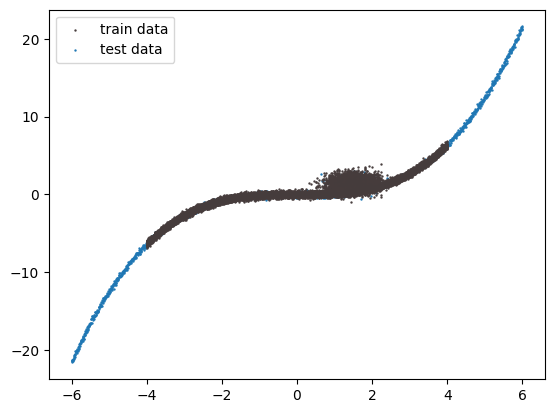

In [ ]:
_, _, x_train, y_train, x_test, y_test = gen_data_mve_regression()

4. Just like in your normal workflow, you'd have your own pre-defined model.

In [ ]:
user_model = get_user_model()

5. You import **CAPSA**'s MVEWrapper() class. This class help wrap your model model to be risk-aware towards aleatoric uncertainty. You only need to pass a predefined model. 

- <span style="color:yellow">**Aleatoric**</span> (Aleatoric Uncertainty): Aleatoric captures the noise in the data: mislabeled datapoints, ambigious labels, classes with low seperation, etc.

In [ ]:
from capsa import  MVEWrapper

6. You wrap your model with the MVEWrapper by simply passing your model as a parameter

In [ ]:
wrapped_model = MVEWrapper(user_model)

7. You compile your model just like how you would compile any other normal Keras model. 

In [ ]:
wrapped_model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=2e-3),
            loss=keras.losses.MeanSquaredError(),
        )

8. You fit your model with your dataset.

In [ ]:
history = wrapped_model.fit(x_train,y_train, epochs=10)

9. Now, your model is trained. You can simply pass a batch of sample to predict both the class of the model, as well as the aleatoric uncertainty

In [ ]:
output = wrapped_model(x_test)

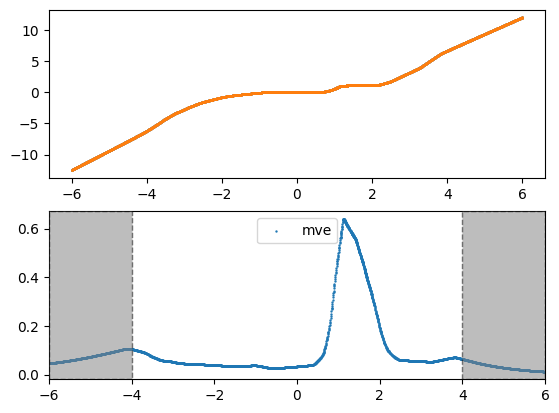

In [ ]:
plot_risk_2d(x_test, y_hat,output, 'mve')

Alternatively, we can pass a single sample to our model and get it's corresponding y_hat and aleatoric uncertainty values

In [ ]:
single_sample = x_test[0:1,:]

In [ ]:
output = wrapped_model(single_sample)

### Sample Prediction

In [ ]:
output.y_hat

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.3574278e-15, 1.0000000e+00]], dtype=float32)>

### Sample Uncertainty

In [ ]:
output.aleatoric

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1.5871763e-14, 3.5843089e-11]], dtype=float32)>